# Vorlesung: Kopierbeziehungen und machine learning: Teil 2 Anwendung

In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
from random import random,randrange
import matplotlib.pyplot as plt 
import itertools
from IPython.display import HTML
import pygraphviz as pgv
import networkx as nx
from collections import Counter
from scipy.misc import factorial

from pandas.tools.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [3]:
def show2images(pnglist,width):
    res = ''.join(['<iframe src={} width={}% height=400></iframe>'.format(png,width) for png in pnglist])
    return HTML(res)

# Konstruktion Kopierbaum als gerichteter Graph

## Initialisierung

In [4]:
NMerkmale=100
NTexte=15

# Wahrscheinlichkeit einer Änderung einer 0
p=0.05 

# Wahrscheinlichkeit einer Änderung einer 1
q=0.25

### Wurzel-Vektor wählen

Die Wurzel beschreibt die Merkmale der grundlegenden Kopiervorlage. Wir können einen zufälligen Wurzel-Vektor erzeugen über die Funktion randrange. Dadurch sind 0 und 1 in der Wurzel gleich-verteilt.

In [5]:
def MWurzel(N):
    return([randrange(2) for i in range(N)])
NM1=MWurzel(NMerkmale)

Um eine höhere Anzahl von gesetzten Merkmalen zu erhalten, können wir auch einen Vektor mit 1 füllen und dann an 20 zufälligen Stellen eine 1 gegen 0 ersetzen.

In [6]:
one = [1]*NMerkmale
for i in range(20):
    one[randrange(NMerkmale)] = 0
NM2 = one

In [7]:
NM = NM2

Die ersten 20 Merkmale der Wurzel

In [8]:
NM[:20]

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]

In [9]:
np.sum(NM)

82

## Modell der Merkmalskopie

Eingabe ist ein Vektor mit Merkmalen. Angegeben wird die Wahrscheinlichkeit, wie ein Merkmal mit binären Werten kopiert wird.

 Angenommen wird, dass die Wahrscheinlichkeit für die Umwandlung einer null in einer 1 p ist, während die Verwandlung von einem Merkmal mit eins in einen null mit der Häufigkeit q auftritt.
 
 http://stackoverflow.com/questions/10803135/weighted-choice-short-and-simple

In [10]:
# mit den wahrscheinlichkeiten p und q werden die Merkmale 0,1 verändert
def Binaerkopie(m,p,q):
    rd=random()
    if m==0:
        if rd<p:
            w=1
        else:
            w=0
    else:
        if rd<q:
            w=0
        else:
            w=1
    return(w)

In [11]:
def ModelKopie(M,p,q):
    copy=[Binaerkopie(M[i],p,q) for i in range(len(M))]
    return(copy)

In [12]:
# Kopie aus dem Wurzelvektor, mit einer Wahrscheinlichkeit der Merkmalsveränderung von p=0.05 für das Merkmal 0 und q=0.25 für 1
NM_Kopie = ModelKopie(NM,p,q)

Die ersten 20 Merkmale

In [13]:
NM_Kopie[:20]

[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]

## Generierung von Kopierbäumen, mit Erstellen des Kopiergraphen

Baut einen direkted graph auf mittels NetworkX Bibliothek.

In [14]:
def Make_Kopiergraph(IniVektor,NTexte):
# dictionary mit allen objekten ID:Merkmalsvektor
    d={0:IniVektor}
    G=nx.DiGraph()
    for i in range(1,NTexte):
        # Zufallsauswahl eines Textes
        pos=randrange(len(d))
        Tsel=d[pos]
        # Kopie des ausgewählen Textes, d[i] ist Merkmalsvektor des i-ten Objekts
        d[i]=ModelKopie(Tsel,p,q)
        # Kopierpaare werden in einen Graph eingetragen
        G.add_edge(pos,i)
    return(G,d)

In [15]:
G,d=Make_Kopiergraph(NM,NTexte)
d[0][:20]

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]

## Visualisierung 
### mit networkx

<IPython.core.display.Javascript object>


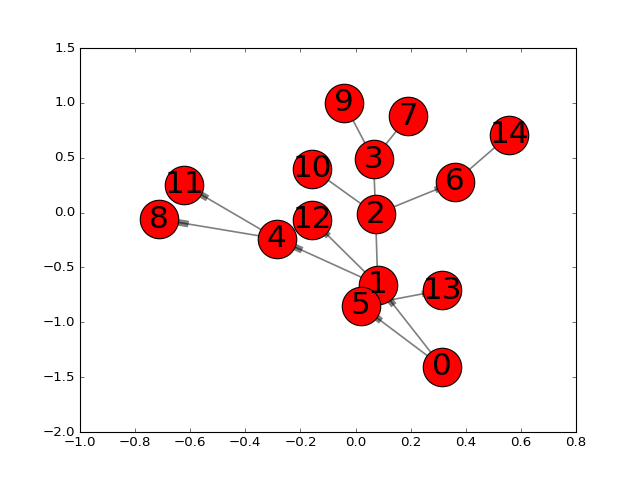

In [16]:
pos=nx.networkx.spring_layout(G)
#draw nodes
# nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_nodes(G, pos, node_color = 'r', node_size = 1200)
#draw edges
nx.draw_networkx_edges(G,pos,width=1.5,alpha=0.5)
#draw the labels
# nx.draw_networkx_labels(G,pos)
nx.draw_networkx_labels(G,pos, font_size=28,font_family='sans-serif')
plt.show()
plt.savefig('labels.png')

### Visualisierung mit pgv

In [17]:
GG=nx.nx_agraph.to_agraph(G)

In [18]:
GG.draw('g.png',prog='dot')
show2images(['g.png'],100)

#### Graph Eigenschaften von AGraph objekten

In [19]:
g=GG.successors(0) # direkten Nachfolger
print(list(g))
n=GG.neighbors(4) # direkten Verbindungen vorher und nachher
print("neighbors=",n)
print(GG.predecessors(5)) # direkter Vorgänger
print(GG.in_neighbors(3))
GG.nodes()

['1', '5']
neighbors= ['8', '11', '1']
['0']
['2']


['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14']

In [20]:
d.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [21]:
# der kürzeste Weg von a nach b in einem gerichteten Graph; ansonsten Fehler
sp2=nx.shortest_simple_paths(G,0,7)
print(list(sp2))

[[0, 1, 2, 3, 7]]


In [22]:
# alle einfachen Pfade von der Wurzel
sp3=nx.all_simple_paths(G,5,0)
print("Pfad von 5 nach 0",list(sp3))
sp3=nx.all_simple_paths(G,0,5)
print("Pfad von 0 nach 5",list(sp3))

Pfad von 5 nach 0 []
Pfad von 0 nach 5 [[0, 5]]


In [23]:
G.has_edge(0,1)

True

# Merkmale und Klassifikation der  zweier Objekte
## Differenzvektoren

In [24]:
def diffv(d,i,j): # vergleich zweier Merkmalsvektoren i und j
    d1=d[i] # vektor des ersten objekts
    d2=d[j] # vektor des zweiten objekts
    diffv1=[]
    for u in range(len(d1)): # vergleich der Vektoren
        if d1[u]==0 and d2[u]==0:
            dv=0
        if d1[u]==1 and d2[u]==1:
            dv=1
        if d1[u]==1 and d2[u]==0:
            dv=2
        if d1[u]==0 and d2[u]==1:
            dv=3
        diffv1.append(dv)
    return(diffv1)

## Klassifikationskategorien
Es wird entschieden, ob zwei Objekte A und B zueinander direkt kausal_relevant sind. Ansonsten müssen sie in einem epiphänomenalen Verhältnis zueinander stehen.

In [25]:
def categorie(i,j,G):
    if G.has_edge(i,j):
        res = 1
    elif G.has_edge(j,i):
        res = 2
    else:
        res = 0
    return res

def Vergleich(d,i,j,G): # vergleich zweier Objekte
    dd=(i,j,diffv(d,i,j),categorie(i,j,G))
    return(dd)

In [26]:
categorie(0,1,G)

1

In [27]:
# Vergleich der ersten beiden Objekte
Vergleich(d,1,0,G)[2][:20]

[1, 1, 3, 3, 0, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 0]

## Objektvergleich: 

(Objekt1,Objekt2, Merkmale und Klassifikatoren)

In [28]:
ObjektVergleich=[]
for j in range(len(d)):
    for k in range(len(d)):
        if k!=j:
            ObjektVergleich.append(Vergleich(d,j,k,G))

In [29]:
ObjektVergleich[0][2][:20]

[1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0]

## Erstellen der Trainingsdaten

Ein Dataframe lässt sich einfach erzeugen durch:

In [30]:
dfObjektVergleich = pd.DataFrame(ObjektVergleich,columns=['dia1','dia2','diff','kopie'])
dfObjektVergleich.head(3)

,dia1,dia2,diff,kopie
0,0,1,"[1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, ...",1
1,0,2,"[1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, ...",0
2,0,3,"[1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, ...",0


Die erste Zeile enthält in der Spalte 'diff' folgende Werte:

In [31]:
diff0 = dfObjektVergleich['diff'].iloc[0]
diff0[:20]

[1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0]

Über den Befehl 'Counter' werden die Häufigkeiten gezählt und als dictionary gespeichert.

In [32]:
Counter(diff0)

Counter({0: 18, 1: 60, 2: 22})

Wenden wir diesen Befehl auf die Spalte 'diff' an, erhalten wir einen Dataframe der Häufigkeiten. Diesen transponieren wir noch, um das Format des Ursprungs-Dataframes zu erhalten.

In [33]:
dfHaeufigkeiten = pd.DataFrame(dict(dfObjektVergleich['diff'].apply(lambda r: Counter(r)))).transpose()            
dfHaeufigkeiten.head(3)

,0,1,2,3
0,18.0,60.0,22.0,NaN
1,17.0,49.0,33.0,1.0
2,17.0,42.0,40.0,1.0


Da der Übergang von 0->1 sehr unwahrscheinlich ist, treten Fälle Nummer 3 selten auf. Wir ersetzten den NaN-Wert durch eine 0. Außerdem nennen wir die Spalten um, damit wir die Übergä

In [34]:
dfHaeufigkeiten = dfHaeufigkeiten.rename(columns={0:'0->0',1:'1->1',2:'1->0',3:'0->1'})
dfHaeufigkeiten = dfHaeufigkeiten.fillna(0)
dfHaeufigkeiten.head(3)

,0->0,1->1,1->0,0->1
0,18.0,60.0,22.0,0.0
1,17.0,49.0,33.0,1.0
2,17.0,42.0,40.0,1.0


## Wahrscheinlichkeit eines Übergangs

Da wir für jede Änderung die zugehörige Wahrscheinlichkeiten kennen, können wir dem Übergang zwischen zwei Merkmalsvektoren eine Gesamtwahrscheinlichkeit zuordnen. Hier können wir zwei unterschiedliche Ansätze verfolgen. 

Betrachten wir jede Merkmalsänderung als unabhängiges Zufallsexperiment, können wir die jeweiligen Wahrscheinlichkeiten multiplizieren. 

Wir erzeugen erst einen Arbeits-Dataframe aus der Kopie der Haeufigkeiten. 

In [35]:
dfTemp = dfHaeufigkeiten.copy()

Nun exponentieren wir die jeweiligen Wahrscheinlichkeiten mit der Anzahl der stattgefundenen Übergänge.

In [36]:
dfTemp['0->0'] = dfTemp['0->0'].apply(lambda row: (1-p)**row)
dfTemp['1->1'] = dfTemp['1->1'].apply(lambda row: (1-q)**row)
dfTemp['0->1'] = dfTemp['0->1'].apply(lambda row: p**row)
dfTemp['1->0'] = dfTemp['1->0'].apply(lambda row: q**row)

In [37]:
dfTemp.head(8)

,0->0,1->1,1->0,0->1
0,0.397214,3.189156e-08,5.684342e-14,1.000000
1,0.418120,7.550955e-07,1.355253e-20,0.050000
2,0.418120,5.656829e-06,8.271806e-25,0.050000
3,0.440127,1.005659e-05,5.169879e-26,0.002500
4,0.397214,1.009069e-08,1.455192e-11,1.000000
5,0.487675,3.178378e-05,2.019484e-28,0.000006
6,0.463291,7.533932e-05,3.155444e-30,0.000125
7,0.440127,1.339366e-04,1.972152e-31,0.002500


Um die resultierenden kleinen Wahrscheinlichkeiten besser darstellen zu können, nutzen wir eine logaritmische Darstellung.

In [38]:
dfTemp['wahr'] = np.log(dfTemp['0->0'] * dfTemp['1->1'] * dfTemp['0->1'] * dfTemp['1->0'])

In [39]:
dfTemp.head(3)

,0->0,1->1,1->0,0->1,wahr
0,0.397214,3.189156e-08,5.684342e-14,1.00,-48.682680
1,0.418120,7.550955e-07,1.355253e-20,0.05,-63.711854
2,0.418120,5.656829e-06,8.271806e-25,0.05,-71.402140


### Zwei unabhängige Bernoulli-Experimente

Eine andere sichtweise des Kopiervorgangs ist durch zwei unabhängige Bernoulli-Experimente gegeben. Für den Übergang von Vektor A zu B wird ein Experiment auf der Menge aller 1er Merkmale N1 im Vektor A durchgeführt. Einen Übergang zu einer 0 werten wir als Treffer. Durch die Zahl in der Spalte '1->0' kennen wir die Anzahl der Treffer k1. Die Wahrscheinlichkeit für k1 Treffer ist dann gegeben durch 
$P_{k_1} = \binom{N_1}{k_1} q^{k_1} (1-q)^{(N_1-k_1)}$. Analog lässt sich $P_{k_0}$ berechnen. Die Gesamtwahrscheinlichkeit ist dann das Produkt $P = P_{k_1} P_{k_0}$

In [40]:

dfTempBernoulli = dfHaeufigkeiten.copy()

N11 = dfTempBernoulli['1->1'] + dfTempBernoulli['1->0']
k1  = dfTempBernoulli['1->0']

dfTempBernoulli['w1Bernoulli'] = (factorial(N11)/(factorial(k1)*factorial(N11-k1)))*q**(k1) * (1-q)**(N11-2*k1)

N01 = dfTempBernoulli['0->0'] + dfTempBernoulli['0->1']
k0  = dfTempBernoulli['0->1']

dfTempBernoulli['w0Bernoulli'] = (factorial(N01)/(factorial(k0)*factorial(N01-k0)))*q**(k0) * (1-q)**(N01-2*k0)
                                 
dfTempBernoulli['wahrEreignis0und1'] = dfTempBernoulli['w0Bernoulli'] * dfTempBernoulli['w1Bernoulli']

dfTempBernoulli.head(3)

,0->0,1->1,1->0,0->1,w1Bernoulli,w0Bernoulli,wahrEreignis0und1
0,18.0,60.0,22.0,0.0,51.652738,0.005638,0.291203
1,17.0,49.0,33.0,1.0,12.224653,0.045102,0.551352
2,17.0,42.0,40.0,1.0,0.192942,0.045102,0.008702


## Daten zusammenfassen

Nun können wir die beiden Dataframes zusammenfassen um die Routinen zu überprüfen.

In [41]:
dfObjektVergleich = dfObjektVergleich.join(dfHaeufigkeiten)

In [42]:
dfObjektVergleich['wahrProdukt'] = dfTemp['wahr']

In [43]:
dfObjektVergleich['wahrBernoulli'] = dfTempBernoulli['wahrEreignis0und1']

In [44]:
dfObjektVergleich.head()

,dia1,dia2,diff,kopie,0->0,1->1,1->0,0->1,wahrProdukt,wahrBernoulli
0,0,1,"[1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, ...",1,18.0,60.0,22.0,0.0,-48.682680,0.291203
1,0,2,"[1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, ...",0,17.0,49.0,33.0,1.0,-63.711854,0.551352
2,0,3,"[1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, ...",0,17.0,42.0,40.0,1.0,-71.402140,0.008702
3,0,4,"[1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, ...",0,16.0,40.0,42.0,2.0,-76.543803,0.006494
4,0,5,"[1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, ...",1,18.0,64.0,18.0,0.0,-44.288230,0.085923


## Daten Visualisierung

###  Histogram der Produkt-Wahrscheinlichkeit

<IPython.core.display.Javascript object>


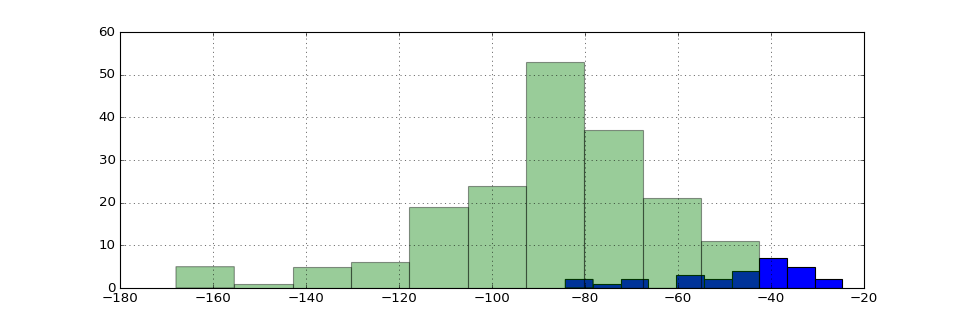

In [45]:
fig = plt.figure(figsize=(12,4))

dfKopieJa = dfObjektVergleich[(dfObjektVergleich['kopie'] == 1) | (dfObjektVergleich['kopie'] == 2)]

dfKopieNein = dfObjektVergleich[(dfObjektVergleich['kopie'] == 0)]

dfKopieJa['wahrProdukt'].hist(bins=10)
dfKopieNein['wahrProdukt'].hist(alpha=0.4,bins=10)

### Scatter Matrix um Clustering zu erkennen

In [46]:
dfScatterPlot = dfObjektVergleich[['0->0','1->1','1->0','0->1','wahrProdukt']]
colors = dfObjektVergleich['kopie'].apply(lambda r: 'b' if r==0 else 'r')

<IPython.core.display.Javascript object>


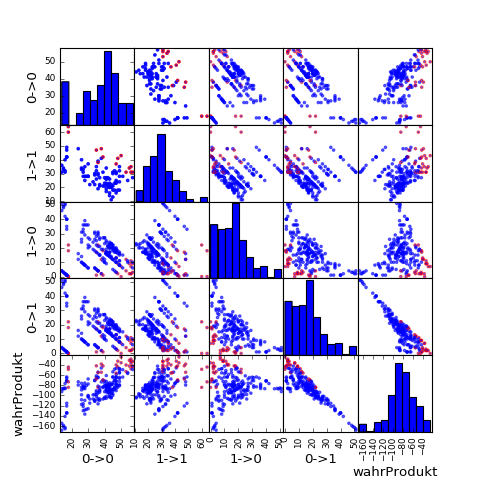

In [87]:
scatter_matrix(dfScatterPlot, alpha=0.6, figsize=(6, 6),color=colors);

# ML

* Aufteilung der Objektmengen:

--  Lernmenge
-- Testmenge
-- Anwendungsfall

* Lernen
* Vorhersagen
* Bewerten
* Crossvalidation

## Trainings-Datensatz erstellen

Der Satz der Trainings-Daten basiert auf der Liste l der möglichen Kombinationen von Merkmalsvektoren. Jeder Eintrag der Liste hat die Form (Knoten A, Knoten B, Differenz(A,B),Kanten: 0/1/2)

In [48]:
X_train = dfObjektVergleich[['0->0','1->1','1->0','0->1','wahrProdukt','wahrBernoulli']] 
#X_train = dfObjektVergleich[['0->0','1->1','wahrProdukt']]

In [49]:
y_train = dfObjektVergleich['kopie']

In [50]:
print("Anzahl Lernpaare:",len(X_train))
X_train.head()

Anzahl Lernpaare: 210


,0->0,1->1,1->0,0->1,wahrProdukt,wahrBernoulli
0,18.0,60.0,22.0,0.0,-48.682680,0.291203
1,17.0,49.0,33.0,1.0,-63.711854,0.551352
2,17.0,42.0,40.0,1.0,-71.402140,0.008702
3,16.0,40.0,42.0,2.0,-76.543803,0.006494
4,18.0,64.0,18.0,0.0,-44.288230,0.085923


In [51]:
print("Anzahl Kategorien:",len(y_train))
y_train.head(30)

Anzahl Kategorien: 210


0     1
1     0
2     0
3     0
4     1
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    2
15    1
16    0
17    1
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    1
26    0
27    0
28    0
29    2
Name: kopie, dtype: int64

Zur Rekonstruktion eines Graphen aus dem klassifizierten Zielvektor müssen wir den Zielvektor - Index einem Kanten zuordnen können. Daher erzeugen wir folgendes dictionary.

In [52]:
kombinationenTemp = list(zip(dfObjektVergleich['dia1'],dfObjektVergleich['dia2'])) 
index2kombiTrain = {i:kombinationenTemp[i] for i in range(len(dfObjektVergleich))}
index2kombiTrain[0]

(0, 1)

### Automatisierung der Erzeugung eines Test-Datensatzes

Da wir auch einen Test-Datensatz benötigen, fassen wir alle obigen Schritte in einer Hilfsfunktion zusammen. 

In [53]:
def datensatz_erzeugen(inputListe,graph):
    # Dataframe mit festgelegten Spaltennamen erzeugen
    dfTemp = pd.DataFrame(inputListe,columns=['dia1','dia2','diff','kopie'])
    # Dataframe mit Anzahl 0/1/2/3 erzeugen,drehen,Spalten umbennenen und NaN durch 0 ersetzen
    dfTemp_diffcount = pd.DataFrame(dict(dfTemp['diff'].apply(lambda r: Counter(r))))\
            .transpose()\
            .rename(columns={0:'0->0',1:'1->1',2:'1->0',3:'0->1'})\
            .fillna(0)
    # Dataframe mit aufgespalteten Merkmalsvektoren
    dfTemp_diff = pd.DataFrame(dict(dfTemp['diff'])).transpose().fillna(0)
    # Alles zusammenfassen
    dfTempFull = dfTemp.join(dfTemp_diffcount)
    ###
    # Gesamt Produkt-Wahrscheinlichkeit angeben
    ###
    dfTempProd = dfTempFull.copy()
    dfTempProd['0->0'] = dfTempProd['0->0'].apply(lambda row: (1-p)**row)
    dfTempProd['1->1'] = dfTempProd['1->1'].apply(lambda row: (1-q)**row)
    dfTempProd['0->1'] = dfTempProd['0->1'].apply(lambda row: p**row)
    dfTempProd['1->0'] = dfTempProd['1->0'].apply(lambda row: q**row)
    #
    dfTempFull['wahrProdukt'] = np.log(dfTempProd['0->0'] * dfTempProd['1->1'] * dfTempProd['0->1'] * dfTempProd['1->0'])
    ###
    # Bernoulli Wahrscheinlichkeit
    ###
    dfTempBernoulli = dfTempFull.copy()
    N11 = dfTempBernoulli['1->1'] + dfTempBernoulli['1->0']
    k1  = dfTempBernoulli['1->0']
    dfTempBernoulli['w1Bernoulli'] = (factorial(N11)/(factorial(k1)*factorial(N11-k1)))*q**(k1) * (1-q)**(N11-2*k1)
    N01 = dfTempBernoulli['0->0'] + dfTempBernoulli['0->1']
    k  = dfTempBernoulli['0->1']
    dfTempBernoulli['w0Bernoulli'] = (factorial(N01)/(factorial(k0)*factorial(N01-k0)))*q**(k0) * (1-q)**(N01-2*k0)                                  
    dfTempFull['wahrBernoulli'] = dfTempBernoulli['w0Bernoulli'] * dfTempBernoulli['w1Bernoulli']
    # Liste der Kombinationen erstellen und mit Index zu dictionary verknüpfen
    kombiListeTemp = list(zip(dfTempFull['dia1'],dfTempFull['dia2'])) 
    index2kombi = {i:kombiListeTemp[i] for i in range(len(dfTempFull))}
    # Trainings-Datensätze:
    # Label-Vektor
    y_Temp = dfTempFull['kopie']
    # Feature-Matrix
    X_Temp = dfTempFull.drop('diff',axis=1).drop('kopie',axis=1).drop('dia1',axis=1).drop('dia2',axis=1)#.drop('wahrBernoulli',axis=1)#.drop('0->1',axis=1).drop('1->0',axis=1)
    # Reihenfolge beachten: X,y, Dataframe, Index-dictionary
    return (X_Temp,y_Temp,dfTempFull,index2kombi)    

## Test-Datensatz erstellen

Für den Test Datensatz nutzen wir den oben erzeugten Graphen G_pruef mit dem dictionary d_pruef und Kanten Kanten_pruef

In [54]:
# einen weiteren Kopiergraphen zur Prüfung des Lerngraphen erzeugen
G_pruef,d_pruef=Make_Kopiergraph(MWurzel(NMerkmale),NTexte)
GG_pruef=nx.nx_agraph.to_agraph(G_pruef) # für die Anzeige

In [55]:
GG_pruef.draw('G_pruef.png',prog='dot')

In [56]:
ObjektPruef = []
for j in range(len(d_pruef)):
    for k in range(len(d_pruef)):
        if k!=j:
            ObjektPruef.append(Vergleich(d_pruef,j,k,G_pruef))

In [57]:
len(ObjektPruef)

210

In [58]:
X_pruef,y_pruef,dfPruef,index2kombi_pruef = datensatz_erzeugen(ObjektPruef,G_pruef)

In [59]:
X_pruef.head(10)

,0->0,1->1,1->0,0->1,wahrProdukt,wahrBernoulli
0,47,37,12,4,-41.673483,1.757791e-06
1,46,28,21,5,-54.505433,1.141041e-05
2,43,22,27,8,-69.930423,1.119287e-07
3,44,17,32,7,-72.479046,2.820301e-09
4,50,36,13,1,-33.938778,2.223530e-06
5,43,15,34,8,-77.620709,5.228746e-09
6,43,12,37,8,-80.916546,5.040129e-12
7,42,16,33,9,-79.466536,6.457256e-10
8,47,12,37,4,-69.138790,2.688069e-11
9,46,16,33,5,-67.688780,5.811530e-11


# Klassifizierung: Nearest Neighbours

In [60]:
from sklearn.neighbors import KNeighborsClassifier

## Training des Klassifiers

In [61]:
neigh = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='braycurtis', p=2, leaf_size=40)

neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=40, metric='braycurtis',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='distance')

## Bewertung der Klassifizierung

Für die Bewertung der Klassifizierung nutzen wir die Routine cross_vall_score, die die Erkennungsrate auf zufällig ausgewählten Teilmengen des Prüfdatensatzes ermittelt.

Wichtig für die Unterscheidungsfähigkeit des Klassifikators ist die Confusionsmatrix. Diese gibt auf der Diagonale an, wieviele Klassen korrekt ermittelt wurden, auf den Neben-Diagonalen werden falsch erkannte Klassen angegeben.

In dem Fall der Klassen 0,1,2 enthält also zB der Eintrag C_00 die Anzahl richtig erkannter Nullen, C_01 die als 1 erkannter Nullen, C_02 die als 2 erkannten Nullen, etc.

Für eine erste grobe Einschätzung des gefundenen Graphens wird außerdem die Summe aller Einträge des vorhergesagten Zielvektors ausgegeben. Ist diese deutlich geringer oder höher als die Anzahl der Kanten im Ursprungs-Graphen, liegt sicher eine schlechte Erkennung vor.

In [62]:
def bewertung_klassifizierung(classifier, X_test,y_test):
    scores = cross_val_score(classifier, X_test, y_test, cv=5,scoring='accuracy')
    y_pred = classifier.predict(X_test)
    print("Accuracy: %0.2f (+/- %0.2f) \n" % (scores.mean(), scores.std() * 2))
    print('Scores: {} \n'.format(scores))
    print('Summe vorhergesagter Links (Eintrag kann 1 oder 2 sein): {}'.format(y_pred.sum()))

In [63]:
def plot_confusion_matrix(classifier,X_test,y_test, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    fig = plt.figure(figsize=(12,4))
    y_pred = classifier.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [64]:
bewertung_klassifizierung(neigh,X_pruef,y_pruef)

Accuracy: 0.93 (+/- 0.05) 

Scores: [ 0.97674419  0.93023256  0.9047619   0.9047619   0.925     ] 

Summe vorhergesagter Links (Eintrag kann 1 oder 2 sein): 49


<IPython.core.display.Javascript object>


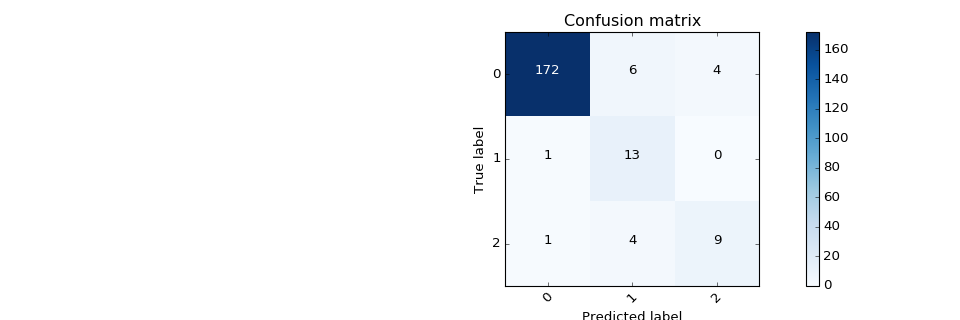

In [65]:
plot_confusion_matrix(neigh,X_pruef,y_pruef,[0,1,2])

# Synthese eines Kausalgraphen aus den kausalen Relevanzen

In der vorherigen Klassifikation wurden kausale Relevanzen zwischen zwei Objekten bestimmt. Ein kausaler Graph reduziert die Relevanzzusammenhänge um solche Kanten, die auf elementare Einzelschritte zurückzuführen sind. Der Kopiergraph nimmt also solche Kanten heraus, für die es einen alternativen  längeren Pfad gibt.

In [66]:
def klassifizierter_Graph(classifier,X_test,y_test,indexDict):
    # Erzeuge leeren Graph
    predictedGraph=pgv.AGraph(compound=True,directed=True)  
    # Quelle für Vorhersage
    predictionSource = X_test
    # Index Menge der Quelle, da Quelle unsortierten Index haben kann
    dictIndex = predictionSource.index.to_series().to_dict()
    # Klassifizierung
    comp = classifier.predict(predictionSource)
    
    for i in range(len(comp)):
        if comp[i] == 1:
            # direkte Kopie: A->B
            key1 = dictIndex[i]
            predictedGraph.add_edge(indexDict[key1])
        elif comp[i] == 2:
            # inverse Kopie: B <- A, daher wird für add_edge Reihenfolge umgekehrt 
            key1 = dictIndex[i]
            order = indexDict[key1]
            predictedGraph.add_edge((order[1],order[0]))
        else:
            pass
    return predictedGraph

Kanten, die zweifach erkannt wurden können wir entfernen. Es wird die Richtung behalten, in der die Knoten Nummer zunimmt.

In [67]:
def delDoubles(inputGraph):
    edgeList = inputGraph.edges()
    dbs = [x for x in itertools.combinations(edgeList,2) if x[0][0]==x[1][1] and x[0][1]==x[1][0]]
    rmEdge = [x[0] if int(x[0][0]) > int(x[0][1]) else x[1] for x in dbs]
    try:
        inputGraph.delete_edges_from(rmEdge)
    except:
        pass
    return print('Entfernte Kanten:',rmEdge)

In [68]:
G_predicted = klassifizierter_Graph(neigh,X_pruef,y_pruef,index2kombi_pruef)

In [69]:
delDoubles(G_predicted)

Entfernte Kanten: [('14', '3'), ('6', '4'), ('8', '4'), ('13', '6'), ('12', '7')]


In [70]:
G_predicted.draw('G_predicted.png',prog='dot')

In [71]:
show2images(['G_predicted.png','G_pruef.png'],50)

## Inverser Check mit Trainingsdaten

In [72]:
G_train_predicted = klassifizierter_Graph(neigh,X_train,y_train,index2kombiTrain)

In [73]:
G_train_predicted.draw('G_train_predicted.png',prog='dot')

In [74]:
show2images(['G_train_predicted.png','g.png'],50)

# Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dtree = DecisionTreeClassifier(max_depth=3,max_features=None,criterion='entropy')

dtree.fit(X_train,y_train)

export_graphviz(dtree, feature_names=X_train.columns,out_file='tree.dot')

!dot -Tpng tree.dot -o tree.png

show2images(["tree.png"],70)

In [76]:
bewertung_klassifizierung(dtree, X_pruef,y_pruef)

Accuracy: 0.88 (+/- 0.08) 

Scores: [ 0.8372093   0.93023256  0.9047619   0.83333333  0.9       ] 

Summe vorhergesagter Links (Eintrag kann 1 oder 2 sein): 71


<IPython.core.display.Javascript object>


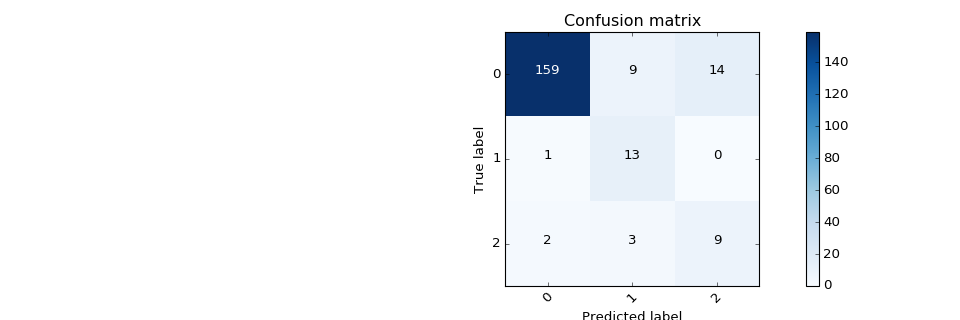

In [77]:
plot_confusion_matrix(dtree,X_pruef,y_pruef,[0,1,2])

In [78]:
G_predicted_dtree = klassifizierter_Graph(dtree,X_pruef,y_pruef,index2kombi_pruef)

In [79]:
delDoubles(G_predicted_dtree)

Entfernte Kanten: [('14', '3'), ('8', '4'), ('12', '7'), ('13', '6')]


In [80]:
G_predicted_dtree.draw('G_predicted_dtree.png',prog='dot')

In [81]:
show2images(['G_predicted_dtree.png','G_pruef.png'],50)